In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format ='svg'

In [3]:
options={
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshhold': '0.3'
}
tfnet=TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.2740027904510498s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Y

In [33]:
img = cv2.imread('opencv_frame_2.png', cv2.IMREAD_COLOR)#to get rgb image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#color transfoms
#img=cv2.imread('dog.jpg')
# use YOLO to predict the image
result = tfnet.return_predict(img)
result
#img.shape
#we will get a dictionary in a list and we have to oterate over it

[{'label': 'person',
  'confidence': 0.0,
  'topleft': {'x': 47, 'y': 21},
  'bottomright': {'x': 586, 'y': 366}},
 {'label': 'person',
  'confidence': 0.0,
  'topleft': {'x': 0, 'y': 16},
  'bottomright': {'x': 581, 'y': 416}},
 {'label': 'person',
  'confidence': 0.0,
  'topleft': {'x': 30, 'y': 24},
  'bottomright': {'x': 607, 'y': 407}},
 {'label': 'person',
  'confidence': 0.0,
  'topleft': {'x': 69, 'y': 20},
  'bottomright': {'x': 637, 'y': 414}},
 {'label': 'person',
  'confidence': 0.0,
  'topleft': {'x': 0, 'y': 0},
  'bottomright': {'x': 600, 'y': 479}},
 {'label': 'person',
  'confidence': 0.7692159,
  'topleft': {'x': 3, 'y': 5},
  'bottomright': {'x': 633, 'y': 473}}]

In [34]:

for i in range(1,len(result)):
    temp=result[i]['confidence']
    if temp > 0.6:
        tl=(result[i]['topleft']['x'],result[i]['topleft']['y']) #top left
        br=(result[i]['bottomright']['x'],result[i]['bottomright']['y']) #bottom right
        label=result[i]['label'] #label on image
        img=cv2.rectangle(img,tl,br,(0,255,0),7)
        img=cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),5)
        print(i)
        #image,text,co-ordinate,font,font_scale,color,linewidth
#result[0]['confidence']# gives the confidence

5


In [35]:
label

'person'

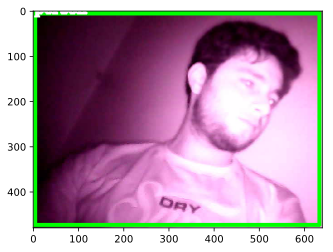

True

In [36]:
#img=cv2.rectangle(img,tl,br,(0,255,0),3)
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#color transfoms
#img=cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()
cv2.imwrite('opencv_frame_2.jpg',img)